In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle


In [3]:
# Load the dataset (modify the path if necessary)
file_path = '/home/adil/intern_tasks/assignment 1/Customer Segmentation/Shopping Mall Customer Segmentation Data .csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the data
print(df.head())


                            Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending Score  
0              89  
1              95  
2              76  
3              57  
4              76  


In [4]:
# Check for missing values
print(df.isnull().sum())

# Drop any missing values or handle them if necessary
df.dropna(inplace=True)  # For simplicity, dropping rows with missing values

# Convert categorical data (Gender) to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Display the data after preprocessing
print(df.head())


Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64
                            Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30       0         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58       1         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62       1          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23       0          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24       0         153752   

   Spending Score  
0              89  
1              95  
2              76  
3              57  
4              76  


                Age        Gender  Annual Income  Spending Score
count  15079.000000  15079.000000   15079.000000    15079.000000
mean      54.191591      0.496319  109742.880562       50.591617
std       21.119207      0.500003   52249.425866       28.726977
min       18.000000      0.000000   20022.000000        1.000000
25%       36.000000      0.000000   64141.000000       26.000000
50%       54.000000      0.000000  109190.000000       51.000000
75%       72.000000      1.000000  155008.000000       75.000000
max       90.000000      1.000000  199974.000000      100.000000


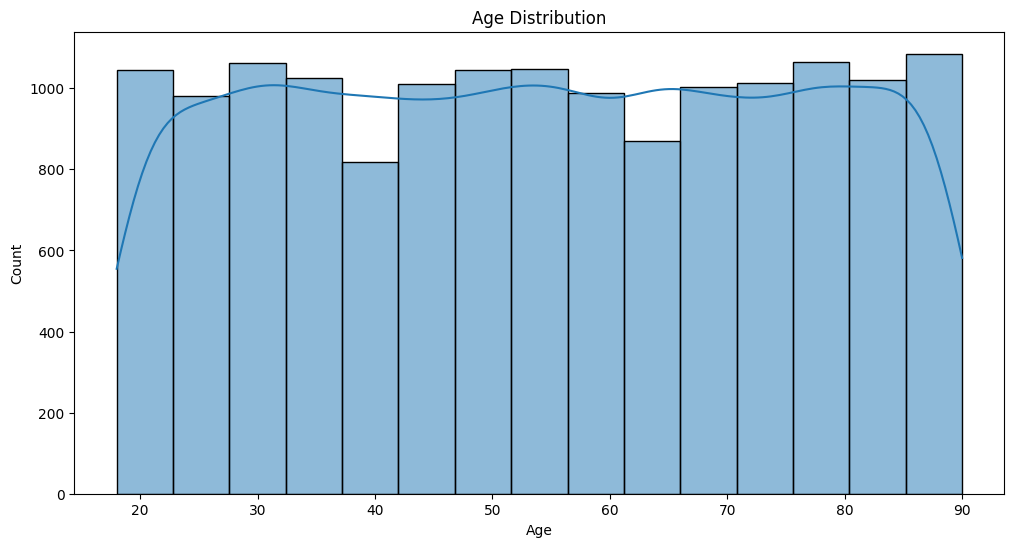

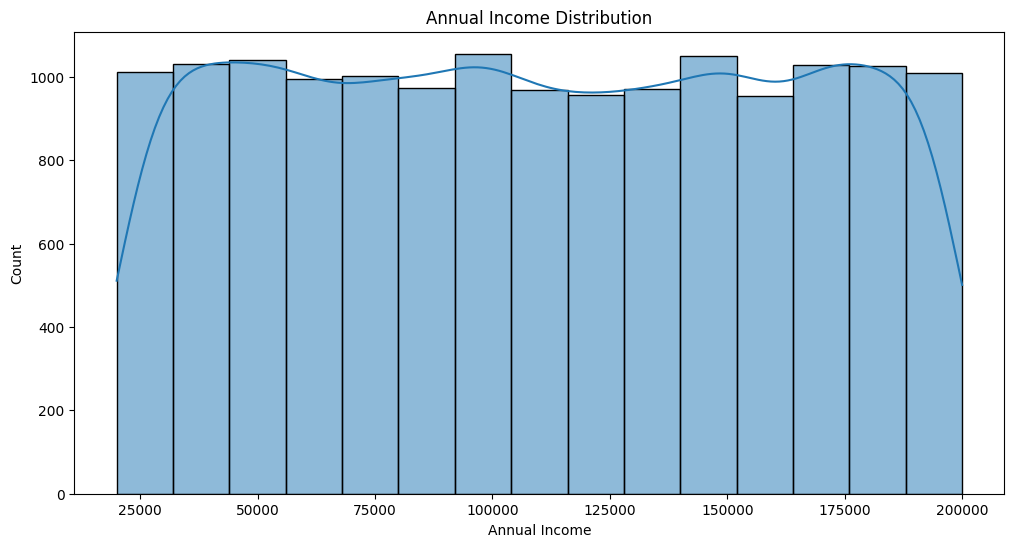

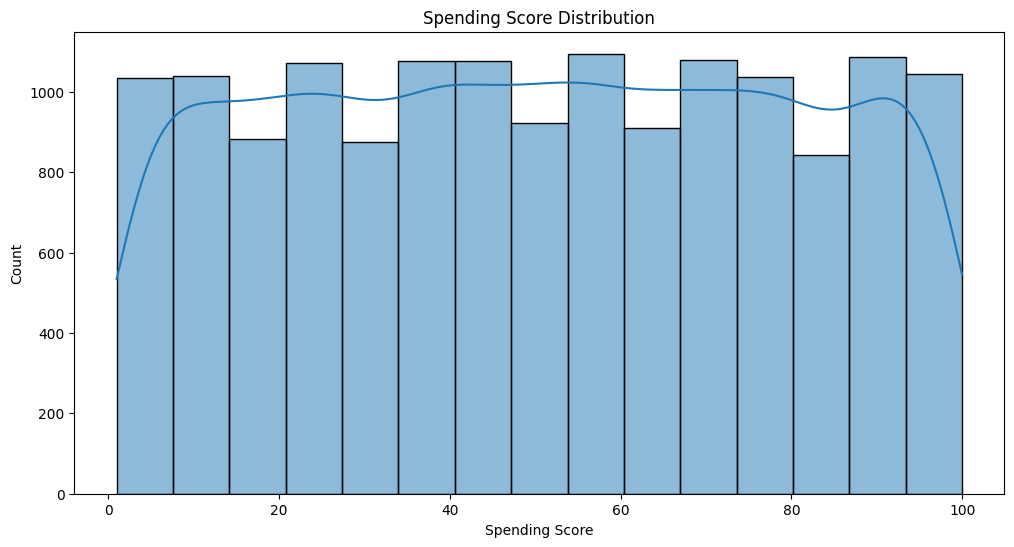

ValueError: could not convert string to float: 'd410ea53-6661-42a9-ad3a-f554b05fd2a7'

<Figure size 1000x700 with 0 Axes>

In [5]:
# Summary statistics
print(df.describe())

# Visualize the distribution of Age, Annual Income, and Spending Score
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Annual Income'], kde=True, bins=15)
plt.title('Annual Income Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Spending Score'], kde=True, bins=15)
plt.title('Spending Score Distribution')
plt.show()

# Correlation heatmap between features
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot to understand relationships between features
sns.pairplot(df)
plt.show()


In [6]:
# Selecting the relevant features for clustering
X = df[['Age', 'Gender', 'Annual Income', 'Spending Score']]

# Split data into training and testing datasets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (12063, 4)
Testing data shape: (3016, 4)


In [7]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (important to avoid data leakage)
X_test_scaled = scaler.transform(X_test)

print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled testing data shape:", X_test_scaled.shape)


Scaled training data shape: (12063, 4)
Scaled testing data shape: (3016, 4)


In [8]:
# Initialize KMeans with the number of clusters (let's assume 5 clusters for now)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the scaled training data
kmeans.fit(X_train_scaled)

# Check the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)


Cluster Centers:
 [[-0.0123428   0.99792969 -0.00719422 -0.86794833]
 [ 0.66363001 -1.0020746   0.10275719  0.90265824]
 [ 0.62046622 -1.0020746   0.02325691 -0.92669111]
 [-1.04025426 -1.0020746  -0.11397131  0.05155641]
 [ 0.01260716  0.99792969  0.01680304  0.85966917]]


In [9]:
# Predict the clusters for both training and test data
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

# Add cluster labels to the original data (for further analysis or visualization)
X_train['Cluster'] = train_clusters
X_test['Cluster'] = test_clusters

# Display a few rows of the clustered training data
print(X_train.head())


       Age  Gender  Annual Income  Spending Score  Cluster
1703    62       0          21886              17        2
3860    21       0          47491              57        3
6334    31       0          94134              70        3
13505   59       1          91755              19        0
11697   58       0          67162              49        2


In [10]:
# Save the KMeans model and scaler to disk for later use
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Models saved as .pkl files.")


Models saved as .pkl files.


In [11]:
# Load the saved KMeans model and scaler
with open('/home/adil/intern_tasks/assignment 1/Customer Segmentation/kmeans_model.pkl', 'rb') as model_file:
    kmeans_loaded = pickle.load(model_file)

with open('/home/adil/intern_tasks/assignment 1/Customer Segmentation/scaler.pkl', 'rb') as scaler_file:
    scaler_loaded = pickle.load(scaler_file)

# Example new data to predict the cluster
new_data = {'Age': [35], 'Gender': ['Male'], 'Annual Income': [75000], 'Spending Score': [60]}
df_new = pd.DataFrame(new_data)

# Convert categorical data (Gender) to numerical values
df_new['Gender'] = df_new['Gender'].map({'Male': 0, 'Female': 1})

# Scale the new data using the loaded scaler
new_data_scaled = scaler_loaded.transform(df_new)

# Predict the cluster using the loaded KMeans model
predicted_cluster = kmeans_loaded.predict(new_data_scaled)

print(f"Predicted Cluster for the new data: {predicted_cluster[0]}")


Predicted Cluster for the new data: 3


In [12]:
# New input data
new_data = {'Age': [35], 'Gender': ['Male'], 'Annual Income': [75000], 'Spending Score': [60]}
df_new = pd.DataFrame(new_data)

# Preprocessing: Convert Gender to numeric
df_new['Gender'] = df_new['Gender'].map({'Male': 0, 'Female': 1})

# Scale the new input using the scaler you already trained (scaler)
new_data_scaled = scaler.transform(df_new)

# Predict using the model you already trained (kmeans)
predicted_cluster = kmeans.predict(new_data_scaled)

print(f"Predicted Cluster: {predicted_cluster[0]}")


Predicted Cluster: 3
